# Ultimate Inc. Challenge

## Introduction

- The attached `logins.json` file contains (simulated) timestamps of user logins in a particular geographic location.
- Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
- Please report/illustrate important features of the demand, such as daily cycles.
- If there are data quality issues, please report them.

### Libraries

In [1]:
# General imports
import pandas as pd
import numpy as np
import seaborn as sns
import json
import datetime

# Matplotlib imports
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# Warnings imports
import warnings
warnings.filterwarnings("ignore")

### Helper function(s)

In [2]:
# Printed barrier function
def barrier():
    print("\n <<<","-"*50,">>> \n")

## Part 1 - Exploratory Data Analysis

In [3]:
# Import data
df_count = pd.read_json("logins.json")

In [4]:
display(df_count.head())
barrier()
display(df_count.tail())

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21



 <<< -------------------------------------------------- >>> 



,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
df_count.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
# Check for null values
df_count["login_time"].isna().sum()

0

**Inference:**
- There are no null values in the dataset.

In [8]:
# Set index, create count feature and sort data frame by index
df_count.set_index("login_time", inplace=True)
df_count["count"] = 1
df_count.sort_index(inplace=True)
display(df_count.head())
barrier()
display(df_count.tail())

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1



 <<< -------------------------------------------------- >>> 



,count
login_time,
1970-04-13 18:48:52,1
1970-04-13 18:50:19,1
1970-04-13 18:54:02,1
1970-04-13 18:54:23,1
1970-04-13 18:57:38,1


**Inference:**
- The data ranges from January 1st 1970 to April 13th 1970.

### Weekday for first of each month

In [9]:
# Find the weekday for the first of each month
for i in range(1, 5):
    print(f"Month {i}, day 1 is on weekday --> {datetime.datetime(1970, i, 1).weekday()}")

Month 1, day 1 is on weekday --> 3
Month 2, day 1 is on weekday --> 6
Month 3, day 1 is on weekday --> 6
Month 4, day 1 is on weekday --> 2


**Inference:**
- January 1st 1970 is a Thursday
- February 1st 1970 is a Sunday
- March 1st 1970 is a Sunday
- April 1st 1970 is a Wednesday

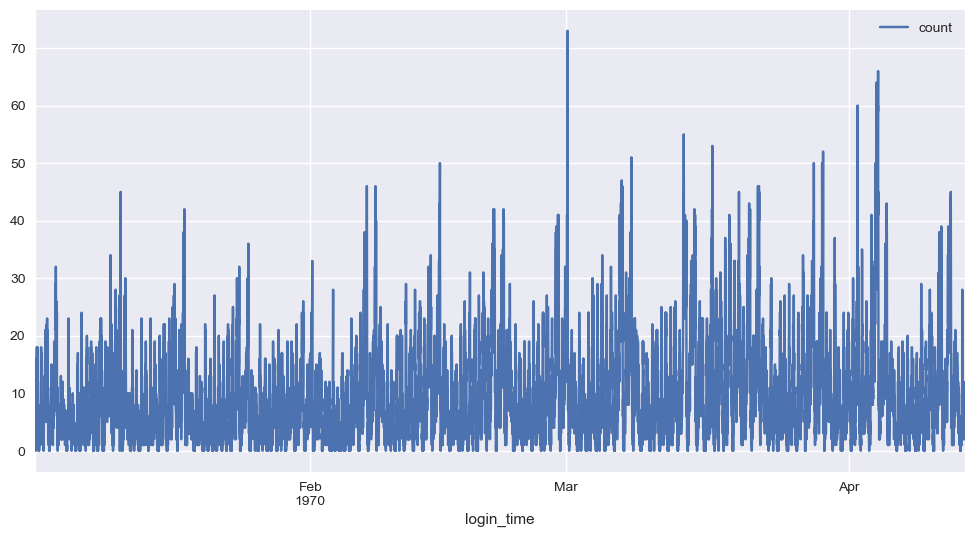

In [10]:
# Resample to 15 minute intervals and plot
df_count = df_count.resample("15min").sum()
df_count.plot(figsize=(12,6))
plt.show()

**Inference:**
- This plot of resampled data over 15 minute intervals spanning a 4 month period doesn't show us anything definitively.
- At a stretch, we might be able to say that there is a sinusoidal pattern that seems to have an increasing mean value and a constant period.

In [11]:
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


**Inference:**
- The median number of logins per 15 minutes is 7.
- The mean is skewed by the spikes and falls in our dataset.

**Now:**
- We can use rolling windows to get a clearer view of the demand pattern

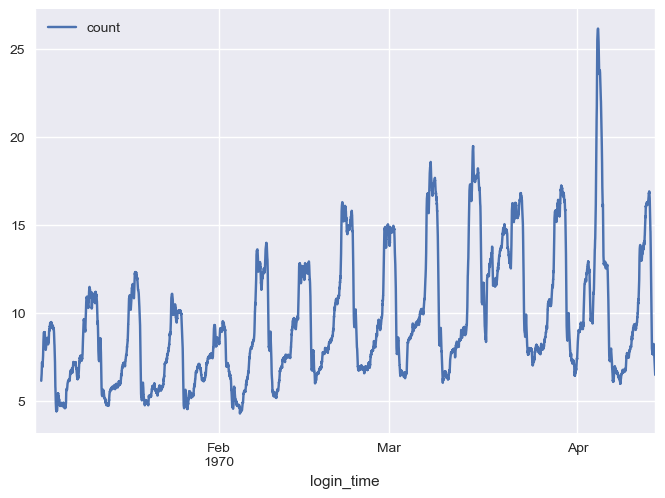

In [12]:
# 3 day rolling window
df_count.rolling(window=96).mean().plot()
plt.show()

**Inference:**
- This shows the weekly rise and fall of demand on a much clearer scale.

**Now:**
- We can plot demand just for the month of February to see if any further insights arise.

### February

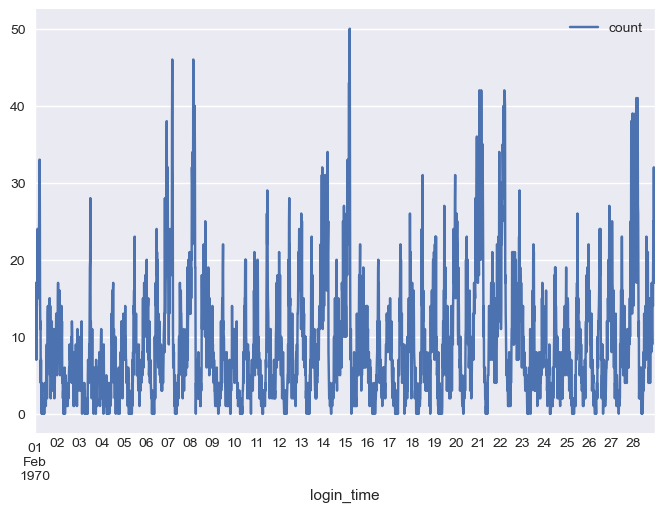

In [13]:
df_count.loc["1970-02"].plot()
plt.show()

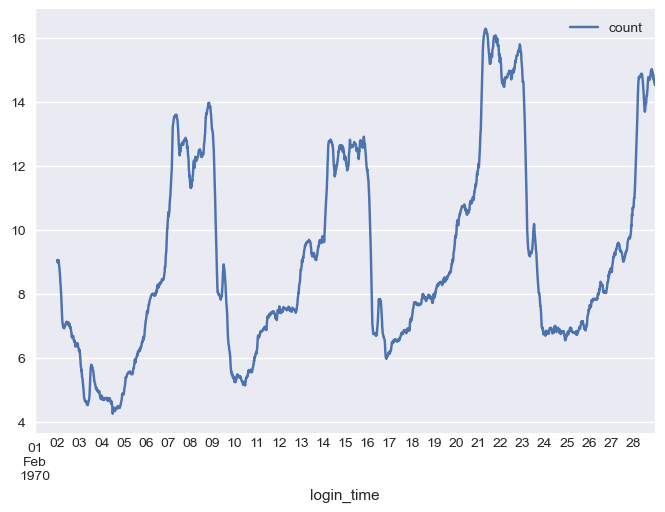

In [14]:
df_count.loc["1970-02"].rolling(window=96).mean().plot()
plt.show()

**Inference:**
- Demand rises on the weekends.
- There are fluctuations in demand on the weekend as well.

**Now:**
- We can plot demand for one week.

### 1 Week

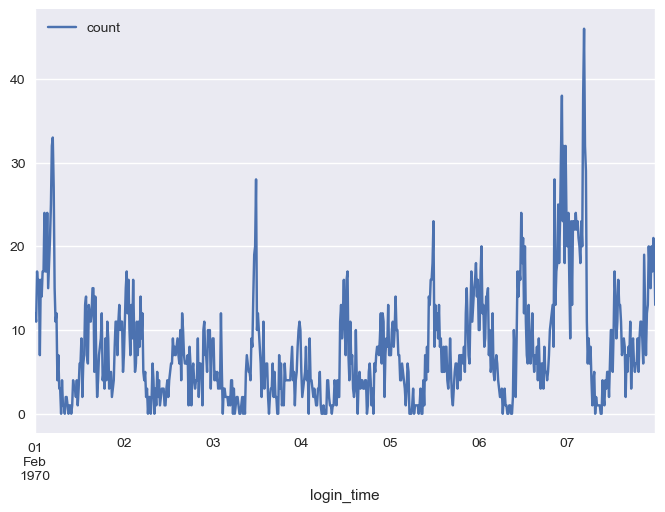

In [15]:
df_count.loc["1970-02-01":"1970-02-07"].plot()
plt.show()

**Inference:**
- This confirms that demand increases at the end of the week.
- We can expand on this.

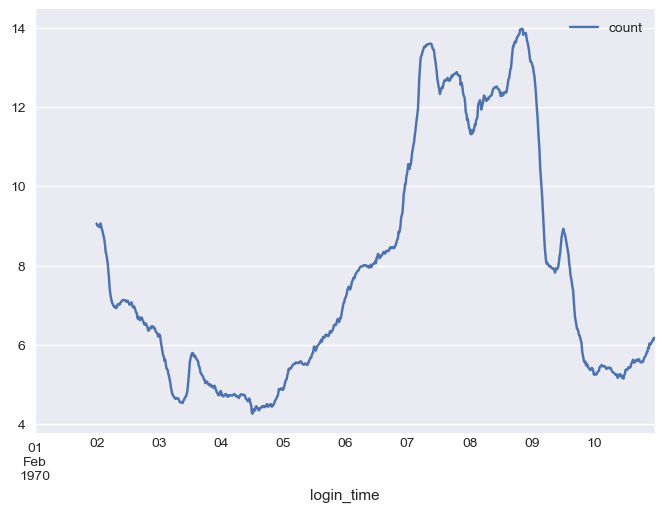

In [16]:
df_count.loc["1970-02-01":"1970-02-10"].rolling(window=96).mean().plot()
plt.show()

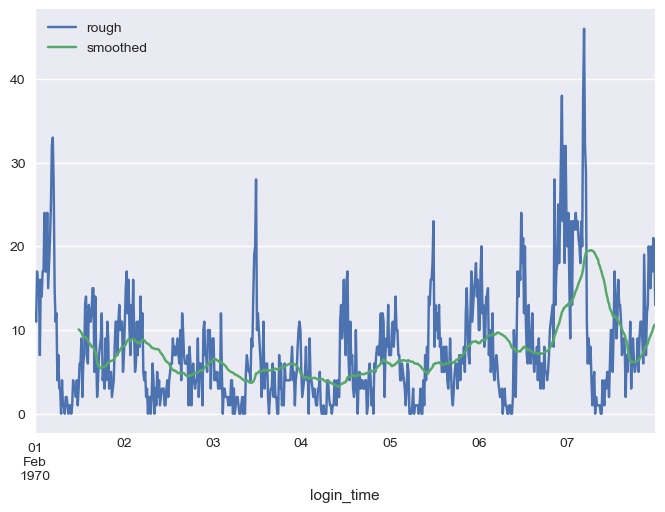

In [17]:
rough = df_count["count"]["1970-02-01":"1970-02-07"]
smoothed = rough.rolling(window=48).mean()
one_week = pd.DataFrame({"rough":rough, "smoothed":smoothed})
one_week.plot()
plt.show()

**Now:**
- We observe one weekend's demand.
- For reference, we will take the weekend of Friday February 13th to Monday February 16th.

### 1 Weekend

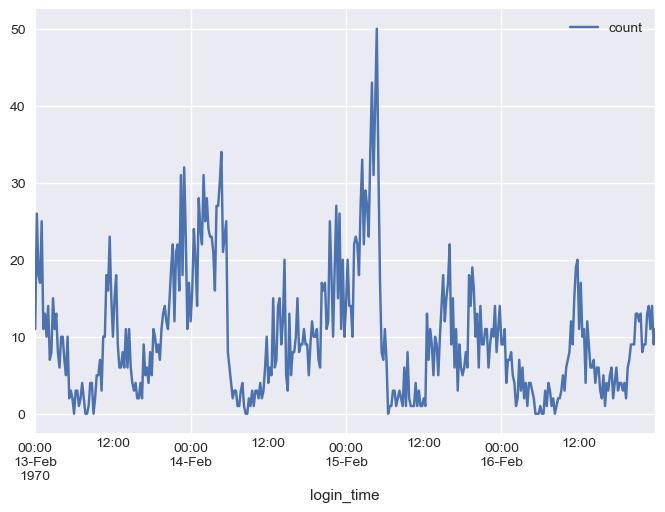

In [18]:
df_count.loc["1970-02-13":"1970-02-16"].plot()
plt.show()

**Inference:**
- Demand peaks around midnight on the weekends.

**Now:**
- Two weekdays.

### 2 Weekdays

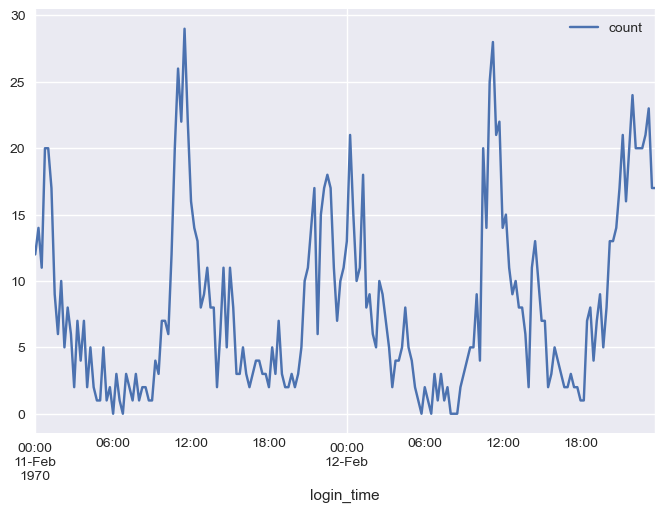

In [19]:
df_count.loc["1970-02-11":"1970-02-12"].plot()
plt.show()

**Inference:**
- Demand peaks at midday and at midnight.

**Now:**
- A 2 weekday pair.

**Recall:**
- March 1 is a Sunday.
- Consequently, March 11 and March 12 are Wednesday and Thursday respectively.

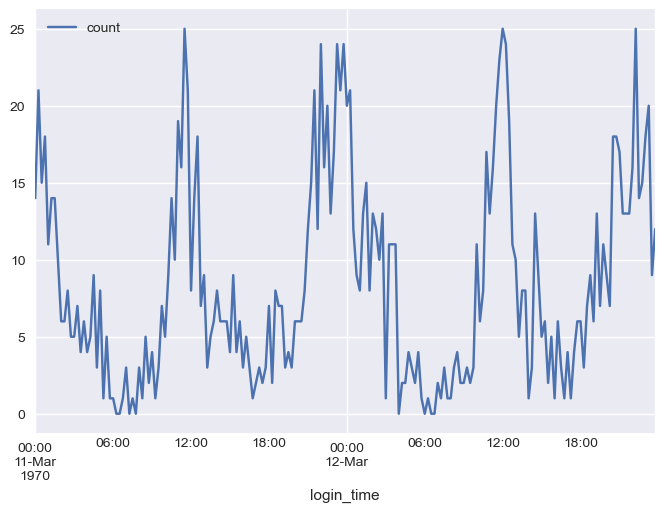

In [20]:
df_count.loc["1970-03-11":"1970-03-12" ].plot()
plt.show()

**Inference:**
- This confirms our deductions:
    - **Demand is higher on the weekends than on weekdays.**
    - **Demand is highest around midnight and midday for both weekdays and weekends.**